# Solutions 7 - Examples in Sparse + Low-Rank Splitting

## Assignment 1

We need functions from the notebook 
[L3 Sparse + Low-Rank Splitting](L3 Sparse + Low-Rank Splitting.ipynb).

In [1]:
# Shrinkage
function Shr{T}(x::Array{T},τ::T)
    sign.(x).*max.(abs.(x)-τ,zero(T))
end

# Singular value thresholding
function D{T}(A::Array{T}, τ::T)
    # U,σ,V=svd(A)
    # This can be replaced by even faster approach using Gram matrix
    G=A'*A
    u,σ,V=svd(G)
    σ=sqrt.(σ)
    S=Shr(σ,τ)
    k=sum(S.>zero(T))
    # U[:,1:k]*diagm(S[1:k])*V[:,1:k]'
    H=V[:,1:k]*diagm(S[1:k]./σ[1:k])*V[:,1:k]'
    A*H
end

D (generic function with 1 method)

In [2]:
function PCPAD{T}(A::Array{T})
    # Initialize
    δ=1.0e-7
    tol=δ*vecnorm(A)
    m,n=size(A)
    S=zeros(A)
    Y=zeros(A)
    L=zeros(A)
    μ=(m*n)/(4*(norm(A[:],1)))
    μ₁=one(T)/μ
    λ=one(T)/sqrt(max(map(T,m),n))
    λμ₁=λ*μ₁
    ν=1e20
    maxiter=1000
    iterations=0
    # Iterate
    while (ν>tol) && iterations<maxiter
        iterations+=1
        L=D(A-S+μ₁*Y,μ₁)
        S=Shr(A-L+μ₁*Y,λμ₁)
        T₁=A-L-S
        Y+=μ*T₁
        ν=vecnorm(T₁)
    end
    L,S, iterations
end

PCPAD (generic function with 1 method)

In [3]:
# For compilation
A0=rand(3,3)
L,S,iter=PCPAD(A0)

([0.34638 0.402171 0.436329; 0.329586 0.373296 0.405807; 0.171587 0.293133 0.309962], [0.0406869 0.0240191 0.0; 0.309851 -0.0 0.417309; -0.0 0.0486011 0.634882], 71)

In [4]:
rank(L), L+S-A0

(2, [0.0 -5.55112e-17 -7.9775e-8; -1.11022e-16 -3.09441e-8 0.0; 1.29132e-8 5.55112e-17 0.0])

In [5]:
using Images
using Colors
using ImageView

In [6]:
f=load("files/visor.avi")

240×320×2292 Array{RGB{N0f8},3}:
[:, :, 1] =
 RGB{N0f8}(0.161,0.169,0.169)  …  RGB{N0f8}(0.114,0.133,0.118)
 RGB{N0f8}(0.161,0.169,0.169)     RGB{N0f8}(0.114,0.133,0.118)
 RGB{N0f8}(0.165,0.173,0.173)     RGB{N0f8}(0.114,0.133,0.118)
 RGB{N0f8}(0.169,0.176,0.176)     RGB{N0f8}(0.114,0.133,0.118)
 RGB{N0f8}(0.169,0.176,0.176)     RGB{N0f8}(0.114,0.133,0.118)
 RGB{N0f8}(0.173,0.18,0.18)    …  RGB{N0f8}(0.114,0.133,0.118)
 RGB{N0f8}(0.176,0.184,0.184)     RGB{N0f8}(0.114,0.133,0.118)
 RGB{N0f8}(0.176,0.184,0.184)     RGB{N0f8}(0.114,0.133,0.118)
 RGB{N0f8}(0.18,0.188,0.188)      RGB{N0f8}(0.125,0.145,0.129)
 RGB{N0f8}(0.18,0.188,0.188)      RGB{N0f8}(0.125,0.145,0.129)
 RGB{N0f8}(0.18,0.188,0.188)   …  RGB{N0f8}(0.125,0.145,0.129)
 RGB{N0f8}(0.18,0.188,0.188)      RGB{N0f8}(0.125,0.145,0.129)
 RGB{N0f8}(0.18,0.188,0.188)      RGB{N0f8}(0.125,0.145,0.129)
 ⋮                             ⋱                              
 RGB{N0f8}(0.306,0.306,0.306)     RGB{N0f8}(0.698,0.706,0.769)
 RGB{N0f8}

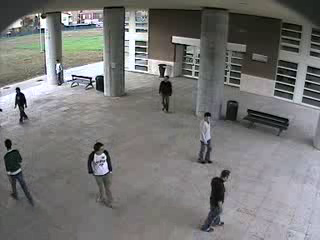

In [7]:
# For example, frame number 1400
f[:,:,1400]

In [8]:
imshow(f)

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}(Pair{String,Any}("window", Gtk.GtkWindowLea…
  "roi"         => Dict{String,Any}(Pair{String,Any}("redraw", 50: "map(f-mappe…
  "annotations" => 3: "input-3" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => nothing

In [9]:
# Make shorter video clip
fs=f[:,:,1401:1420]
imshow(fs)

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}(Pair{String,Any}("window", Gtk.GtkWindowLea…
  "roi"         => Dict{String,Any}(Pair{String,Any}("redraw", 100: "map(f-mapp…
  "annotations" => 53: "input-22" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => nothing

In [10]:
# Map the video to Gray
fsg=map(Gray,fs)
imshow(fsg)

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}(Pair{String,Any}("window", Gtk.GtkWindowLea…
  "roi"         => Dict{String,Any}(Pair{String,Any}("redraw", 155: "map(clim-m…
  "annotations" => 104: "input-41" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 103: "CLim" = ImageView.CLim{FixedPointNumbers.Normed{UInt8,…

In [11]:
# Turn frames into tall matrix
mi,ni=size(fsg[:,:,1])
m=mi*ni
n=20
A=Array{Float64}(m,n)
for i=1:n
    A[:,i]=vec(float(fsg[:,:,i]))
end

In [12]:
size(A)

(76800, 20)

In [13]:
# For orientation
@time Q,R=qr(A);
@time D(A,0.5);

  0.289671 seconds (76.56 k allocations: 27.474 MiB, 5.13% gc time)
  0.014497 seconds (41 allocations: 11.772 MiB)


In [23]:
# Compute the splitting - 20 minutes
@time L,S,iters=PCPAD(A)

382.946764 seconds (63.02 k allocations: 160.304 GiB, 71.24% gc time)


([0.180392 0.180392 … 0.168627 0.168627; 0.180392 0.180392 … 0.168627 0.168627; … ; 0.709804 0.709804 … 0.709804 0.709804; 0.698039 0.698039 … 0.709804 0.709804], [0.0 0.0 … 0.0 -0.0; 0.0 0.0 … 0.0 -0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], 1000)

In [16]:
@load "files/visor_results.jld"

2-element Array{Symbol,1}:
 :L
 :S

In [17]:
# Reconstruct the low-rank video component
rank(L), vecnorm(A-L-S)

(6, 0.00012011469870750945)

In [18]:
svdvals(L)[1:20]

20-element Array{Float64,1}:
 618.458      
   8.85229    
   7.52376    
   3.64446    
   0.798787   
   0.000110906
   8.04132e-14
   2.53296e-14
   2.49619e-14
   2.2515e-14 
   2.1546e-14 
   1.91578e-14
   1.74157e-14
   1.57497e-14
   1.57418e-14
   1.54083e-14
   1.19517e-14
   1.14212e-14
   9.84046e-15
   9.68631e-15

In [19]:
# How to restore the video?
v=L[:,1]
v1=reshape(v,mi,ni)
imshow(v1)

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}(Pair{String,Any}("window", Gtk.GtkWindowLea…
  "roi"         => Dict{String,Any}(Pair{String,Any}("redraw", 192: "map(clim-m…
  "annotations" => 158: "input-59" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 157: "CLim" = ImageView.CLim{Float64}(-4.554430031465399e-8,…

In [20]:
Lf=similar(fsg)
Sf=similar(fsg)
for i=1:n
    Lf[:,:,i]=reshape(L[:,i],mi,ni)
    Sf[:,:,i]=clamp01.(reshape(S[:,i],mi,ni)+0.3)
end

In [21]:
# Play the low-rank part
imshow(Lf)

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}(Pair{String,Any}("window", Gtk.GtkWindowLea…
  "roi"         => Dict{String,Any}(Pair{String,Any}("redraw", 247: "map(clim-m…
  "annotations" => 196: "input-72" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 195: "CLim" = ImageView.CLim{FixedPointNumbers.Normed{UInt8,…

In [22]:
# Play the sparse part
imshow(Sf)

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}(Pair{String,Any}("window", Gtk.GtkWindowLea…
  "roi"         => Dict{String,Any}(Pair{String,Any}("redraw", 302: "map(clim-m…
  "annotations" => 251: "input-91" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 250: "CLim" = ImageView.CLim{FixedPointNumbers.Normed{UInt8,…

How to improve the visibility of the sparse component?

In [15]:
using JLD

In [55]:
@save "files/visor_results.jld" L S